In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
f_name = 'general.xlsx'
df = pd.read_excel(f_name,sheet_name='Empleo_pres',skiprows=1,index_col='Período')

Separar en sectores

In [ ]:
privado = df[[col for col in df.columns if 'privado' in col]]
privado.rename(columns={k:k.replace('privado','').strip() for k in privado.columns},inplace=True)
publico = df[[col for col in df.columns if 'público' in col]]
publico.rename(columns={k:k.replace('público','').strip() for k in publico.columns},inplace=True)
autonomos = df[[col for col in df.columns if 'autónomos' in col]]
autonomos.rename(columns={k:k.replace('autónomos','').strip() for k in autonomos.columns},inplace=True)

# Plot


In [153]:
def plot_presidentes(df,title):
    fig,ax = plt.subplots(dpi=300,figsize=(8,4),facecolor='white')
    fig.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    min_val = np.inf
    max_val = -np.inf
    colores_plot = { #Datos por presidente
        'Cristina Fernández (segundo)':'#00B0F0',
        'Mauricio Macri':'#FFD98F',
        'Alberto Fernández':'#92D050',
        'Javier Milei':'#502F73',
    }
    for presidente in df.columns:
        x_ultima_observacion = df[presidente].last_valid_index() #Para el marcador
        y_ult_obs = df[presidente].iloc[x_ultima_observacion]
        if df[presidente].max()>max_val: #Rango de valores de y
            max_val = df[presidente].max()
        if df[presidente].min()<min_val:
            min_val = df[presidente].min()
        ax.plot(df.index,df[presidente],color=colores_plot[presidente],lw=3,label=presidente) # Graficar los 3 en el eje
        ax.plot(x_ultima_observacion,y_ult_obs,marker='o',markersize=11,color=colores_plot[presidente]) #Puntito de la ult. observacion
        

    distancia_con_etiqueta = (max_val - min_val)/8
    coords_track = {} #Evitar que se superpongan
    for presidente in df.columns:
        nueva_distancia = distancia_con_etiqueta
        x_ultima_observacion = df[presidente].last_valid_index() #Para el marcador
        y_ult_obs = df[presidente].iloc[x_ultima_observacion]
        for c in coords_track.values(): #c es una lista con las coordenadas x e y de cada etiqueta
            print('HI',np.abs(y_ult_obs-nueva_distancia-c[1]))
            if (c[0] == x_ultima_observacion and np.abs(y_ult_obs-nueva_distancia-c[1]) < nueva_distancia/2):
                nueva_distancia *=2
                break
        y_dis = y_ult_obs-nueva_distancia if y_ult_obs<0 else y_ult_obs+nueva_distancia
        ax.annotate( #Numero que marca ult. observacion
            text=str(np.round(y_ult_obs,1)).replace('.',','),
            xy=(x_ultima_observacion,y_ult_obs-20),
            xytext=(x_ultima_observacion-1,y_dis),
            xycoords='data',
            color=colores_plot[presidente],
            fontfamily='Arial',
            fontsize=14,
            fontweight='bold'
        )
        coords_track[presidente] = [x_ultima_observacion,y_ult_obs-nueva_distancia]

    ax.hlines(y=0, xmin=0, xmax=48, linewidth=0.3, color='#000000'),
    ax.legend()
    ax.set_xlim([0,49])
    ax.set_ylim([min_val-3*distancia_con_etiqueta,max_val+2*distancia_con_etiqueta])
    ax.set_xticks(np.arange(0,49,4)),
    ax.set_ylabel('Variación absoluta acumulada',fontfamily="Arial")
    ax.set_title(f"Sector {title}",fontfamily='Arial',fontweight='bold',fontsize=16,color='#595959')
    fig.savefig(f'presidentes_{title}.png',bbox_inches='tight')


HI 415.2950000000001
HI 165.42899999999918
HI 580.7239999999993
HI 248.1260000000002
HI 167.16899999999987
HI 413.5549999999994
{'Cristina Fernández (segundo)': [48, 108.65875000000005], 'Mauricio Macri': [48, -306.63625], 'Alberto Fernández': [48, 274.08774999999923], 'Javier Milei': [3, -139.46725000000015]}


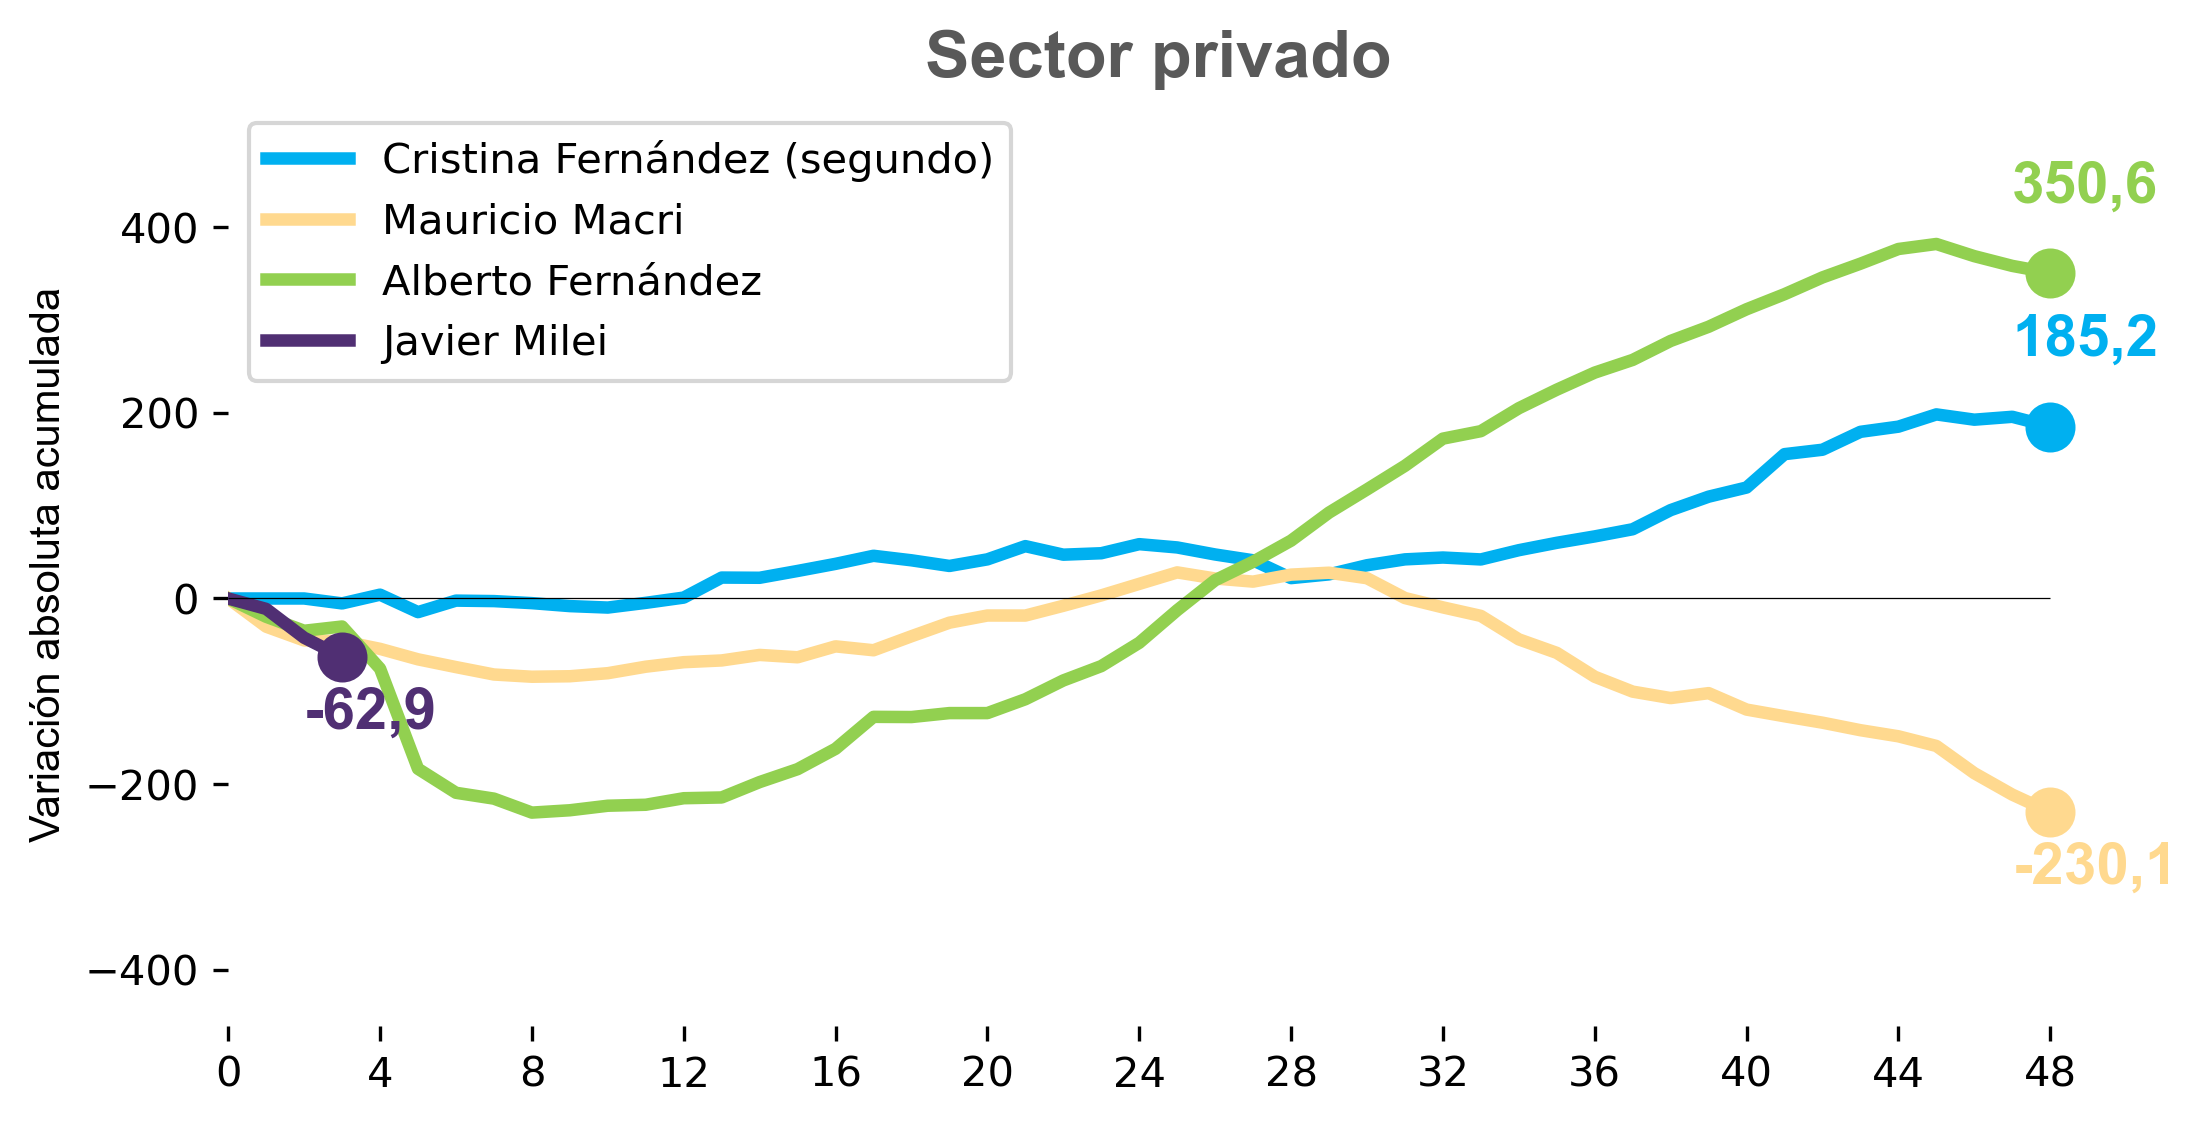

In [154]:
plot_presidentes(privado,'privado')



HI 432.1420000000003
HI 263.5640000000003
HI 168.57799999999997
HI 564.6189999999997
HI 132.4769999999994
HI 301.0549999999994
{'Cristina Fernández (segundo)': [48, 471.8761250000001], 'Mauricio Macri': [48, 39.734124999999835], 'Alberto Fernández': [48, 208.3121249999998], 'Javier Milei': [3, -92.74287499999957]}


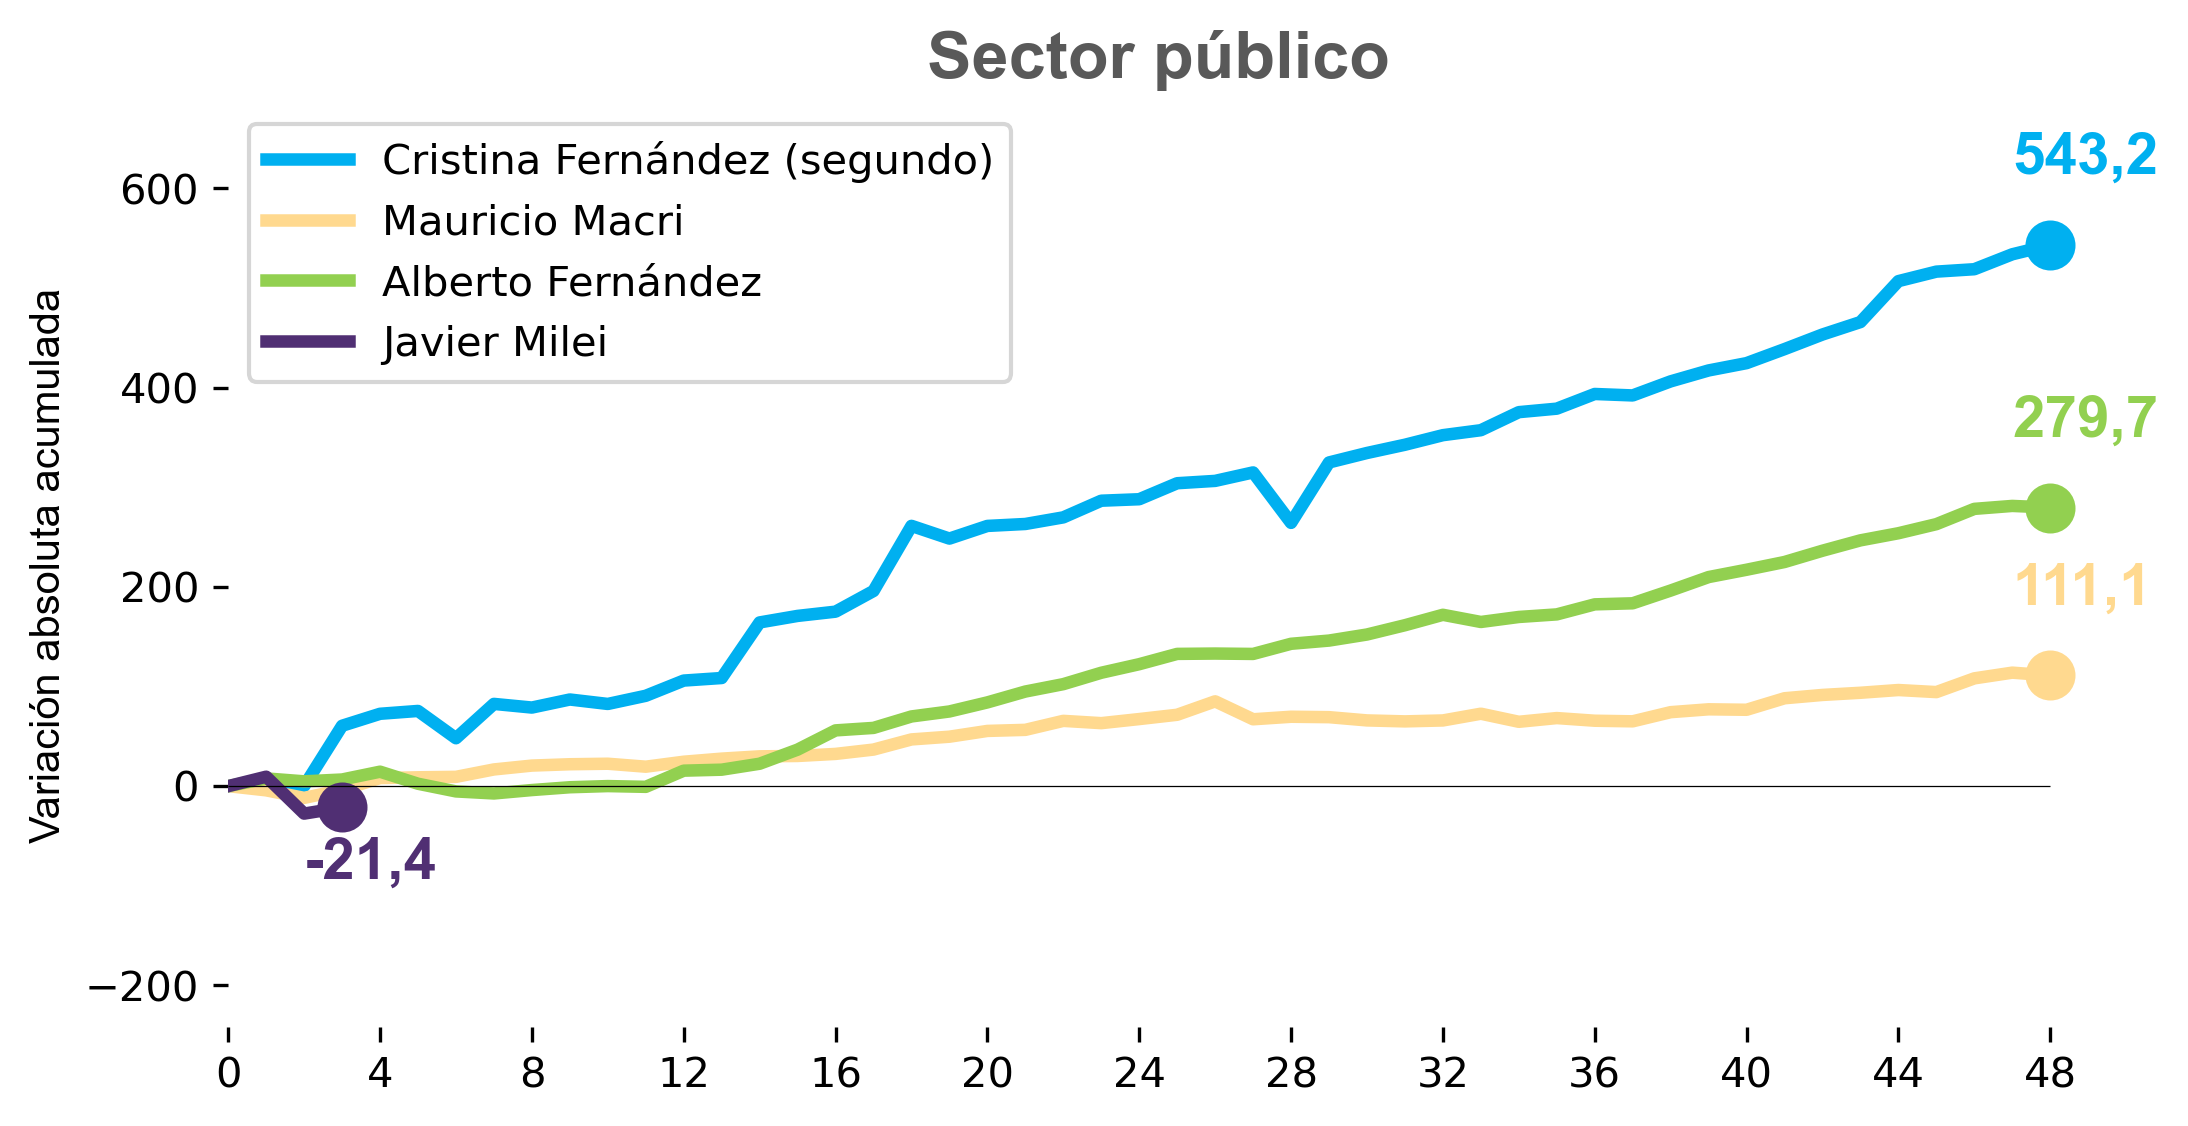

In [155]:
plot_presidentes(publico,'público')

HI 2.8629999999999995
HI 53.22199999999997
HI 38.91299999999997
HI 38.34600000000006
HI 52.655000000000065
HI 91.56800000000004
{'Cristina Fernández (segundo)': [48, -11.510000000000026], 'Mauricio Macri': [48, -25.81900000000003], 'Alberto Fernández': [48, -64.732], 'Javier Milei': [3, 26.836000000000034]}


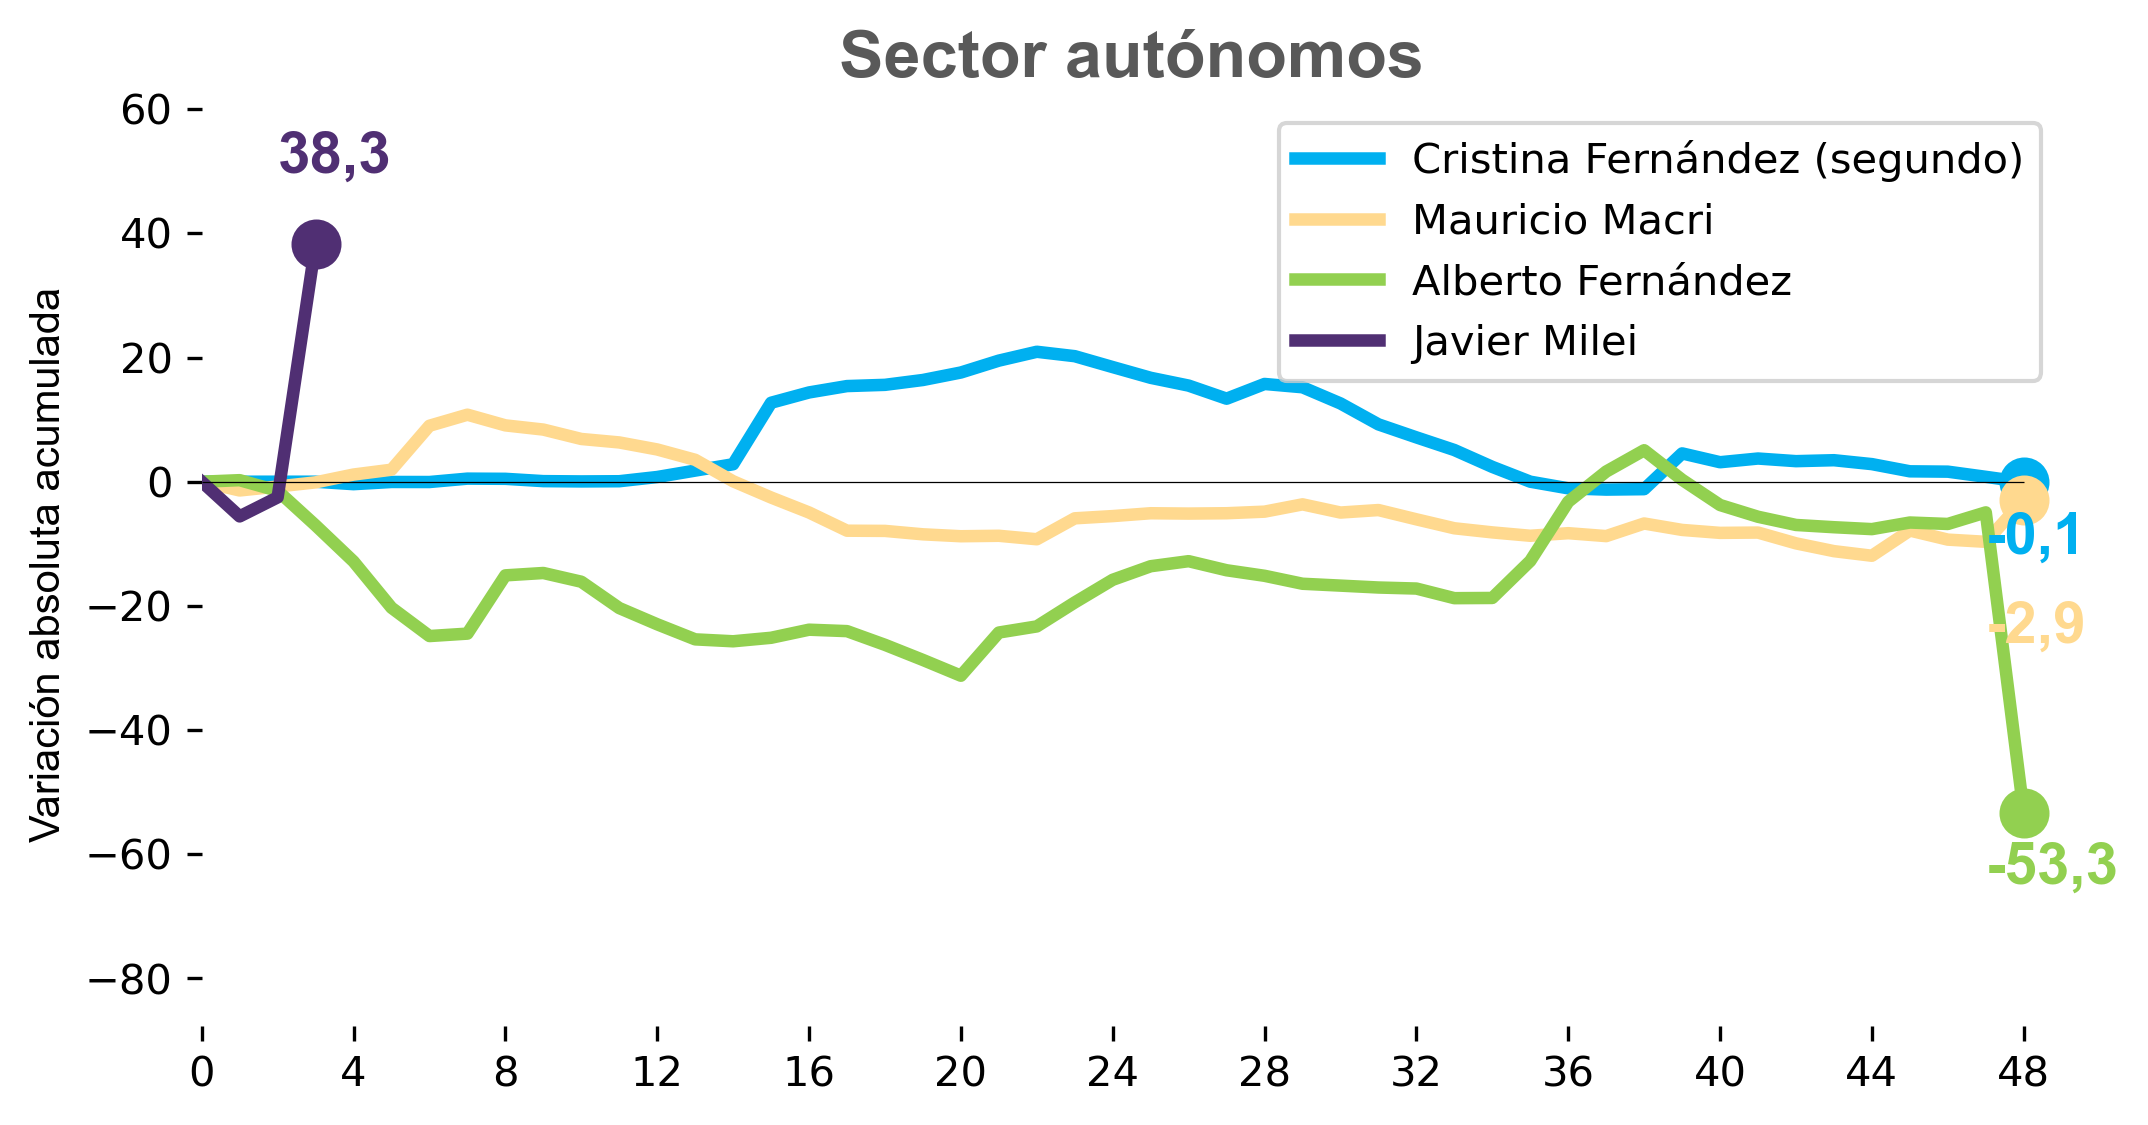

In [156]:
plot_presidentes(autonomos,'autónomos')